# Decision Tree

In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()

# We only take the two features corresponding to the pair 
pair = [0,1]
X, y = iris.data[:, pair] , iris.target

In [3]:
# ... to fit the decision tree classifier model.
model = DecisionTreeClassifier().fit(X, y)

# Define appropriate x and y ranges for each plot...
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

In [4]:
plot_res = 0.01
# ... and use each range to define a meshgrid to use as the plotting area.
xx, yy = np.meshgrid(np.arange(x_min, 
                               x_max, 
                               plot_res),
                     np.arange(y_min, 
                               y_max, 
                               plot_res))

In [5]:
# Predict the classification of each point in the meshgrid based on the calculated model above.
# The numpy methods .c_() and .ravel() reshape our meshgrid values into a 
#format compatible with our model.predict() method,
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
# Reshape the predictions to match xx...
Z = Z.reshape(xx.shape)

In [6]:
xx.shape

(341, 461)

In [7]:
xx.shape, yy.shape, Z.shape

((341, 461), (341, 461), (341, 461))

(3.8, 8.399999999999903, 1.5, 4.900000000000003)

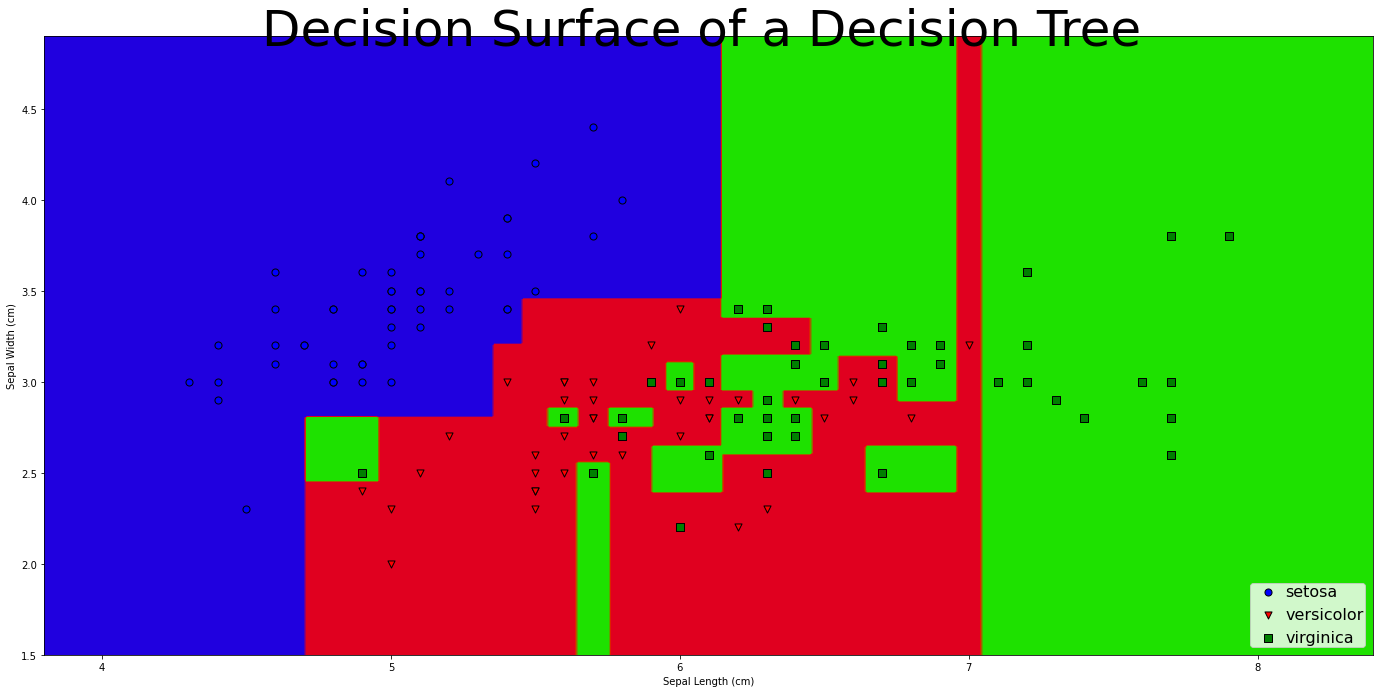

In [8]:
import matplotlib.pyplot as plt

# Set the size of the figure used to contain the subplots to be generated.
plt.figure(figsize=(20,10))

class_count = 3
# Define standard RGB color scheme for visualizing 
#ternary classification in order to match the color map used later.
plot_colors = 'brg'
# Define marker options for plotting class assignments of training data.
markers = 'ovs'
# We also need to establish a resolution for plotting. 
#I favor clean powers of ten, but this is not by any means a hard and fast rule.
plot_res = 0.01

pair_index = 0
pair = [0,1]

plt.subplot(1, 1, pair_index + 1)

# Use plt.tight_layout() to establish spacing of the subplots.
plt.tight_layout(h_pad = 0.5, 
                 w_pad = 0.5, 
                   pad = 4.0 )

# ... and prepare a contour plot that reflects the predictions .
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.brg)

# Define the subplot axis labels after title casing while preserving case on the unit of measure 
plt.xlabel(iris.feature_names[pair[0]].title()[0:-4] + iris.feature_names[pair[0]][-4:])
plt.ylabel(iris.feature_names[pair[1]].title()[0:-4] + iris.feature_names[pair[1]][-4:])

# Plot the training points for each species in turn
for i, color, marker in zip(range(class_count), plot_colors, markers):
    # Subset the data to the class in question with the np.where() method
    index = np.where(y == i)
    # Plot the class in question on the subplot
    plt.scatter(X[index, 0], 
                X[index, 1], 
                c = color,
                marker = marker,
                label = iris.target_names[i],
                cmap = plt.cm.brg, 
                edgecolor = 'black', 
                s = 50                       )

# Define a title for the overall collection of subplots after each subplot is fully defined
plt.suptitle('Decision Surface of a Decision Tree',
             size = 50                                                   )

# Define the legend for the subplot collection
plt.legend(loc = 'lower right',
           fontsize = 16,
           borderpad = 0.1, 
           handletextpad = 0.1 )

# Set limits just large enough to show everything cleanly
plt.axis("tight")

# Visualizing DT

In [10]:
# iris

In [11]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

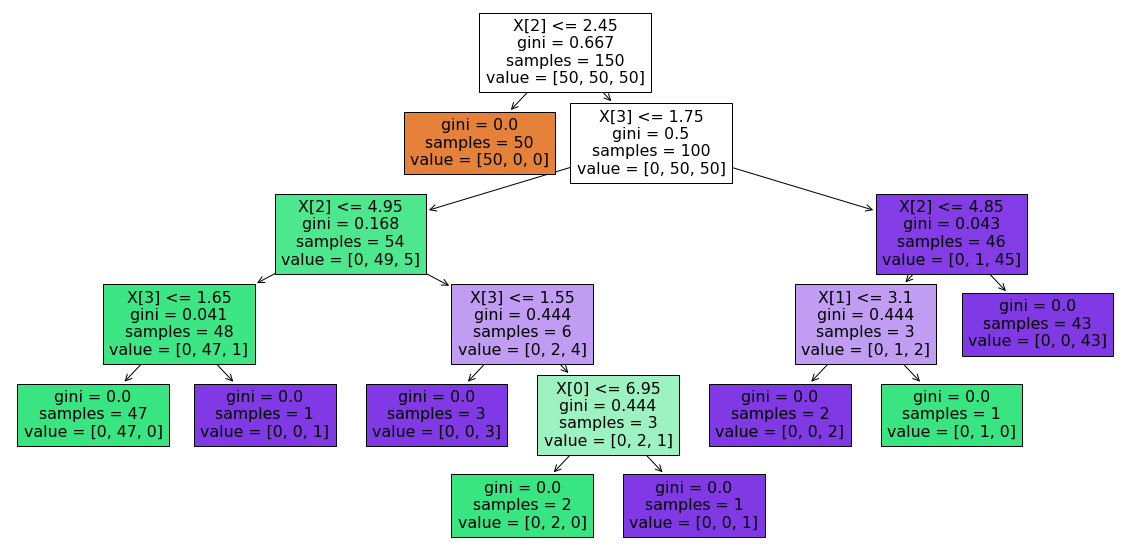

In [12]:
from sklearn.tree import plot_tree

dt = DecisionTreeClassifier()
dt.fit(iris.data, iris.target)
# Prepare a plot figure with set size.
plt.figure(figsize = (20,10))
# Plot the decision tree, showing the decisive values and the improvements in Gini impurity along the way.
plot_tree(dt, filled=True)
# Display the tree plot figure.
plt.show()

### Implement MyDTClassifier. You can choose to 

In [12]:
from sklearn.metrics import accuracy_score
import numpy as np

class MyDTClassifier:
    
    def __init__(self, max_depth, min_size):
        self.max_depth, self.min_size = max_depth, min_size
  

    def get_gini_and_splitting_value(data):
        
        # TODO
        return    


    class node:
    
        def __init__(self, data, max_depth, min_size=3):

            # TODO
                

    def fit(self, X_train, y_train):
        # TODO


    def predict(self, X_test):
        # TODO
        return 
    
    
    def score(self, prediction, y):
        return # TODO

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=4)

In [14]:
tree = MyDTClassifier(max_depth=3, min_size=3)
tree.fit(X_train, y_train)
prediction = tree.predict(X_test)
tree.score(prediction, y_test)

0.9666666666666667